In [1]:
# Import the appropriate packages for data exporatory, cleaning, wrangling and visulizations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
# access the data 

df = pd.read_csv('C:/Users/ziad_/OneDrive/Desktop/Dsquare task/zomato.csv')
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
# Check some info about the data, like null values, column fullnames, columns datatypes,columns number
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
# Check if there's any null values and count their summation

df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
# Drop irrelevent columns, irrelevent as it's not important for analysis

df.drop(['menu_item','url', 'address','location'], axis = 1, inplace =True)

In [9]:
# Initialize a function to fill null values.

def fillnull(col, value):
    col.fillna(value, axis=0, inplace=True)

fillnull(df['dish_liked'],'none')
fillnull(df['phone'],'0')
fillnull(df['cuisines'],'normal')
df['rest_type'] = df['rest_type'].fillna(df['listed_in(type)'])

Above I decided to keep these columns but about the null values I thought that filling them with none or 0 for pjone column, will be more effecient more than dropping them, to get benefit of them

In [10]:
# Rename some columns to new simple name to ease accessing them i further processes

df = df.rename(columns ={"approx_cost(for two people)":"cost_for_two", 
                         "listed_in(type)":"Restaurant_type",
                         "listed_in(city)":"location", "rate":"rate(5)"})

In [11]:
# Check data again after edtiting 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             51717 non-null  object
 1   online_order     51717 non-null  object
 2   book_table       51717 non-null  object
 3   rate(5)          43942 non-null  object
 4   votes            51717 non-null  int64 
 5   phone            51717 non-null  object
 6   rest_type        51717 non-null  object
 7   dish_liked       51717 non-null  object
 8   cuisines         51717 non-null  object
 9   cost_for_two     51371 non-null  object
 10  reviews_list     51717 non-null  object
 11  Restaurant_type  51717 non-null  object
 12  location         51717 non-null  object
dtypes: int64(1), object(12)
memory usage: 5.1+ MB


In [14]:
# Check if there's duplictaed entries and remove them if exists

print(df.duplicated().sum())
df = df.drop_duplicates()

0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51651 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             51651 non-null  object
 1   online_order     51651 non-null  object
 2   book_table       51651 non-null  object
 3   rate(5)          43891 non-null  object
 4   votes            51651 non-null  int64 
 5   phone            51651 non-null  object
 6   rest_type        51651 non-null  object
 7   dish_liked       51651 non-null  object
 8   cuisines         51651 non-null  object
 9   cost_for_two     51306 non-null  object
 10  reviews_list     51651 non-null  object
 11  Restaurant_type  51651 non-null  object
 12  location         51651 non-null  object
dtypes: int64(1), object(12)
memory usage: 5.5+ MB


In [17]:
# check unique values of rating to check if it's 100% clear and clean

df['rate(5)'].unique()


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

As we can see above, there are some outliers like **(-)** or **(NEW)** and some null values, so we need to change them, also remove **/5** from each value, to ease dealing with values as **numeric** values instead of **strings**

In [18]:
df['rate(5)'] = df['rate(5)'].str.replace('/5', '')
df['rate(5)'] = df['rate(5)'].str.replace('NEW', '0')
df['rate(5)'] = df['rate(5)'].str.replace('-','0')
df['rate(5)'] = df['rate(5)'].str.replace('nan','0')

df['rate(5)'] = pd.to_numeric(df['rate(5)'])
df['rate(5)'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, nan, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4,
       2.2, 2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [21]:
# About null values ? fill them with mean rate of ratings 

df['rate(5)'].fillna(df['rate(5)'].mean(), inplace = True)
df['rate(5)'].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       0.        , 2.9       , 3.5       , 3.50939373, 2.6       ,
       3.4       , 4.5       , 2.5       , 2.7       , 4.7       ,
       2.4       , 2.2       , 2.3       , 4.8       , 4.9       ,
       2.1       , 2.        , 1.8       ])

In [22]:
#Check the cost attribute to check if there's any problem.

df['cost_for_two'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

as we can see, there's wrong entry of numbers they put **,** for decimal instead of **.**
We need to fix that.

In [23]:
df['cost_for_two'] = df['cost_for_two'].str.replace(',','.')
df['cost_for_two'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1.200', '350', '250',
       '950', '1.000', '1.500', '1.300', '199', '80', '1.100', '160',
       '1.600', '230', '130', '50', '190', '1.700', nan, '1.400', '180',
       '1.350', '2.200', '2.000', '1.800', '1.900', '330', '2.500',
       '2.100', '3.000', '2.800', '3.400', '40', '1.250', '3.500',
       '4.000', '2.400', '2.600', '120', '1.450', '469', '70', '3.200',
       '60', '560', '240', '360', '6.000', '1.050', '2.300', '4.100',
       '5.000', '3.700', '1.650', '2.700', '4.500', '140'], dtype=object)

In [28]:
# Convert the datatype to numeric type and check the data again

df['cost_for_two'] = pd.to_numeric(df['cost_for_two'])
df['cost_for_two'].fillna(df['cost_for_two'].mean(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51651 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51651 non-null  object 
 1   online_order     51651 non-null  object 
 2   book_table       51651 non-null  object 
 3   rate(5)          51651 non-null  float64
 4   votes            51651 non-null  int64  
 5   phone            51651 non-null  object 
 6   rest_type        51651 non-null  object 
 7   dish_liked       51651 non-null  object 
 8   cuisines         51651 non-null  object 
 9   cost_for_two     51651 non-null  float64
 10  reviews_list     51651 non-null  object 
 11  Restaurant_type  51651 non-null  object 
 12  location         51651 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 5.5+ MB


In [69]:
'''
there's null values in reviews column, I will fill them by the corresponding value of rating, 
if the rate above or equal 3.75 it will say good, OW bad
'''

df['reviews_list'] = df['reviews_list'].str.slice(25)
counter = 0
for i, j in zip(df['reviews_list'], df['rate(5)']):
    if i == '':
        if j >= 3:
            df.loc[df.index[counter], 'reviews_list'] = 'good'
        else:
            df.loc[df.index[counter], 'reviews_list'] = 'bad'
    counter += 1

In [70]:
print(df.isnull().sum())


name               0
online_order       0
book_table         0
rate(5)            0
votes              0
phone              0
rest_type          0
dish_liked         0
cuisines           0
cost_for_two       0
reviews_list       0
Restaurant_type    0
location           0
dtype: int64


In [72]:
df.head(20)

,name,online_order,book_table,rate(5),votes,phone,rest_type,dish_liked,cuisines,cost_for_two,reviews_list,Restaurant_type,location
0,Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,in.The interiors take you back to the Mughal ...,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,080 41714161,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,with family. Turned out to be a good choose su...,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,+91 9663487993,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,enough and it's not a pocket friendly cafe an...,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,nataka style full meals. Been there twice and ...,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,eighbourhood. Buffet system is properly arrang...,Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,ervice 3/5\n\nHad been here for family lunch. ...,Buffet,Banashankari
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,+91 9731716688\r\n080 26740366,Casual Dining,none,"North Indian, South Indian, Andhra, Chinese",800.0,iceFriendly staffsGood quality of food\n# Comp...,Buffet,Banashankari
7,Onesta,Yes,Yes,4.6,2556,080 48653961\r\n080 48655715,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,"this place ! The ambience with the rooftop , ...",Cafes,Banashankari
8,Penthouse Cafe,Yes,No,4.0,324,+91 8884135549\r\n+91 9449449316,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700.0,"with one of my friends, it's a very small plac...",Cafes,Banashankari
9,Smacznego,Yes,No,4.2,504,+91 9945230807\r\n+91 9743804471,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550.0,\nTaste 5/5\nYummy cheesyyy fries ?\nDelicious...,Cafes,Banashankari


# Now the data is clear and clean, let's go for analysis

In [225]:
# Save the new cleaned data 

df.to_csv('new_data.csv')

# Analysis process

# Univariate analysis question:

    1- what's the percentage of resturants that make online order? categories (0 or 1)
    2- what's the percentage of resturants that can book tables? (0 for no) (1 for yes)
    3- what's the most frequent type of returants types ?    
    4- What's the distribution of rating ?
    5- what's the statistic summary of cost ?    
    6- what's the statistic summary of rating?

# Bivariate analysis:

    1- What's the correlation between the features ?
    2- Does the acceptance of online orders affect the average cost for two people?
    3- Is there relationship between table booking and the restaurant rating?
    4- How does the number of votes affect the rating
    5- Does the acceptance of online orders affect the average rate?

# First: Univariate analysis 

1- what's the percentage of resturants that make online order? categories (0 or 1)

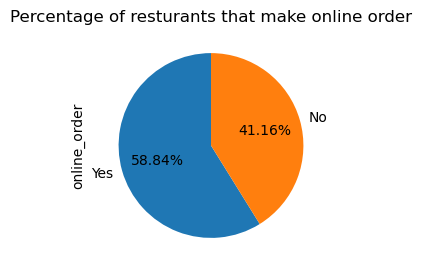

In [73]:
order_counts = df['online_order'].value_counts()

order_counts.plot(kind='pie', figsize=(3, 3), autopct='%1.2f%%', startangle=90)

plt.title("Percentage of resturants that make online order")

plt.show()

Conclusion: almost of the restaurants have the option to online order by (58.84%) and (41.16%) haven't

2- what's the percentage of restaurants that can book tables? (0 for no) (1 for yes)

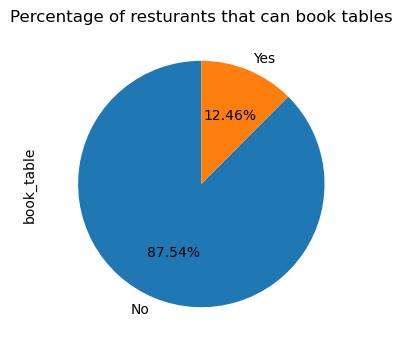

In [74]:
order_counts = df['book_table'].value_counts()

order_counts.plot(kind='pie', figsize=(4, 4), autopct='%1.2f%%', startangle=90)

plt.title("Percentage of resturants that can book tables")

plt.show()

Conclusion: big percentage of the restaurants haven't the option to book table by (87.54%) and (12.46%) can.

3- what's the most frequent type of restaurants types ?

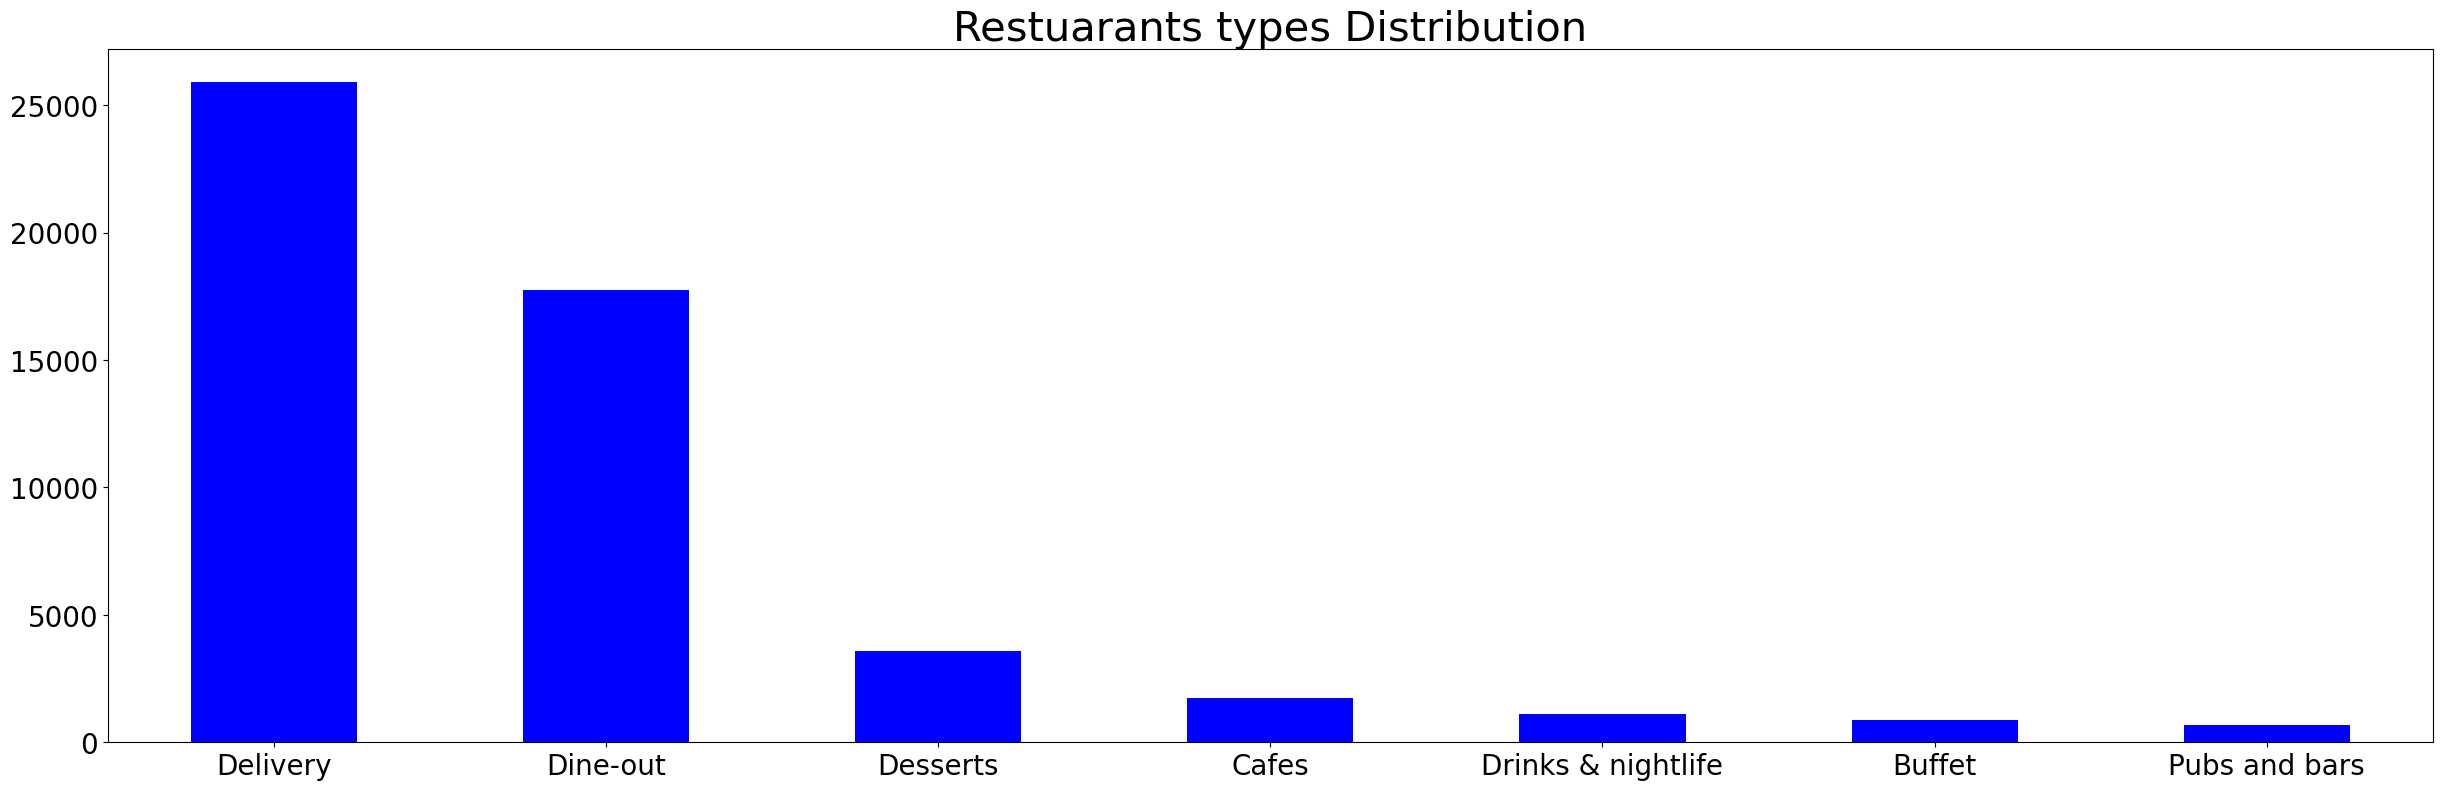

In [75]:
list_type_counts = df['Restaurant_type'].value_counts()

ax = list_type_counts.plot(kind='bar', figsize=(30, 9), color='b')

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.title("Restuarants types Distribution", fontsize=30)
plt.xticks(rotation=0)


plt.show()

Conclusion: The most appeared types of restaurants is delievery then dine out restaurants, the other types are rarely appeared, we can conclude that thery are not preferred or liked by people, they focus on delievery and dine out 

4- What's the distribution of rating ?

Text(0, 0.5, 'Count')

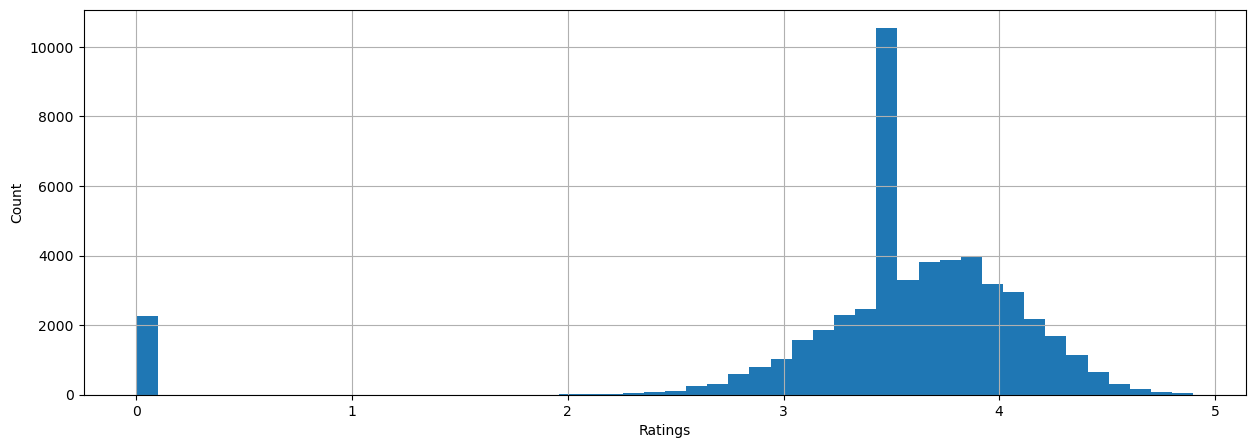

In [76]:
df["rate(5)"].hist(figsize = (15,5) ,bins = 50)
plt.xlabel("Ratings")
plt.ylabel("Count")

Conclusion: As we can see that the rates are left skewed, the most frequent rates varies from more than 2 and less than 5, and 0 rates they are outlier but it's important as it's more than 2000 zero rates

5- what's the statistic summary of cost ?

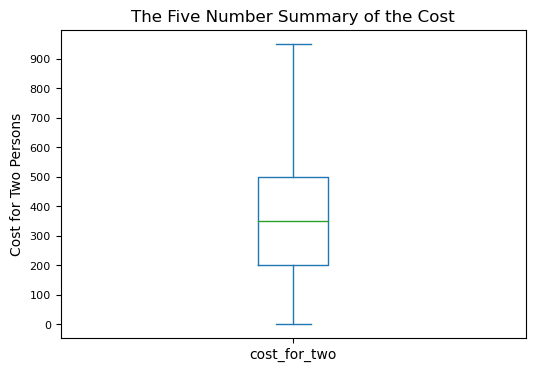

In [77]:
ax = df['cost_for_two'].plot(kind='box', figsize=(6, 4))

# Set the y-axis ticks and labels
ax.set_yticks(range(0, int(df['cost_for_two'].max()) + 1, 100))
ax.set_yticklabels(range(0, int(df['cost_for_two'].max()) + 1, 100), fontsize=8)

# Add a title and y-axis label
plt.title('The Five Number Summary of the Cost')
plt.ylabel('Cost for Two Persons')

# Display the chart
plt.show()

Conclusion: Almost the median cost is 350, There's a big difference between the IQR 2 and max value.

6- what's the statistical summary of rating ?

In [78]:
df['rate(5)'].describe()

count    51651.000000
mean         3.509394
std          0.852315
min          0.000000
25%          3.400000
50%          3.600000
75%          3.900000
max          4.900000
Name: rate(5), dtype: float64

# Second: Bivariate analysis:

1- What's the correlation between the features ?

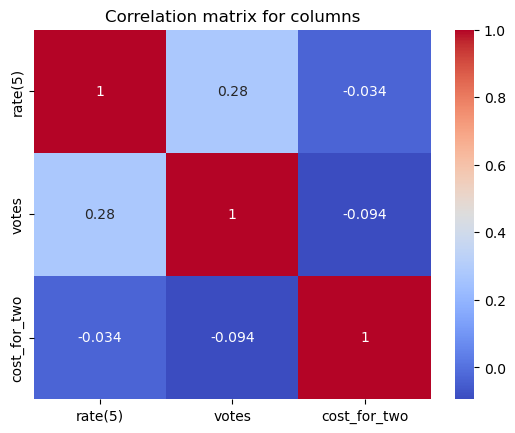

In [79]:
corr_matrix = df.corr()

fig, ax = plt.subplots()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

ax.set_title('Correlation matrix for columns')
plt.show()

Conclusion: As we can see above, There's no correlation between the columns, They are independent somehow.

2- Does the acceptance of online orders affect the average cost for two people?


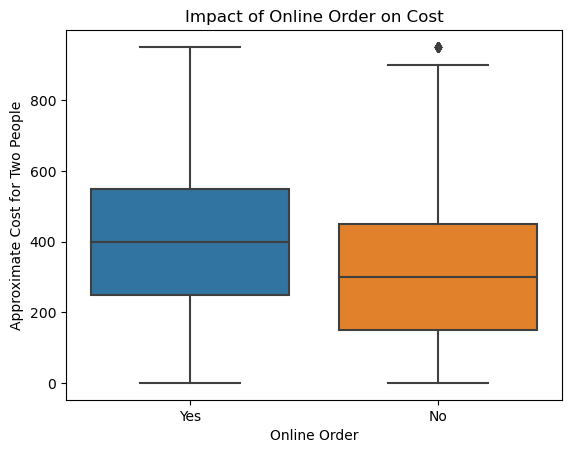

In [80]:
sns.boxplot(data=df, x='online_order', y='cost_for_two')
plt.xlabel('Online Order')
plt.ylabel('Approximate Cost for Two People')
plt.title('Impact of Online Order on Cost')
plt.show()

conclusion: If the restaurants has option to order online, it increases the cost somehow as it's appeared in the orange box plot

3- Is there relationship between table booking and the restaurant rating?

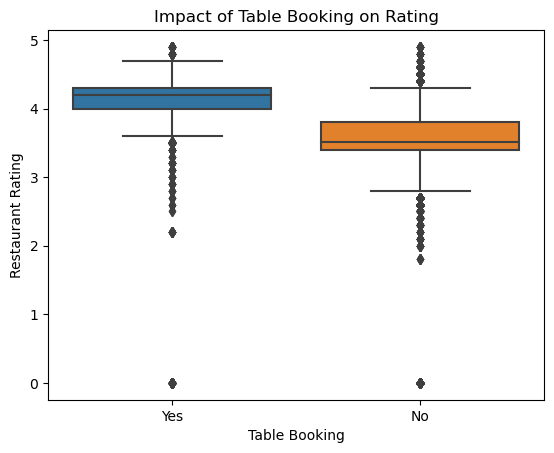

In [81]:
sns.boxplot(data=df, x='book_table', y='rate(5)')
plt.xlabel('Table Booking')
plt.ylabel('Restaurant Rating')
plt.title('Impact of Table Booking on Rating')
plt.show()

conclusion: If the resturant has option to book table, it increases the rating  as it's appeared in the orange box plot, it increased over 4

4- How does the number of votes affect the rating

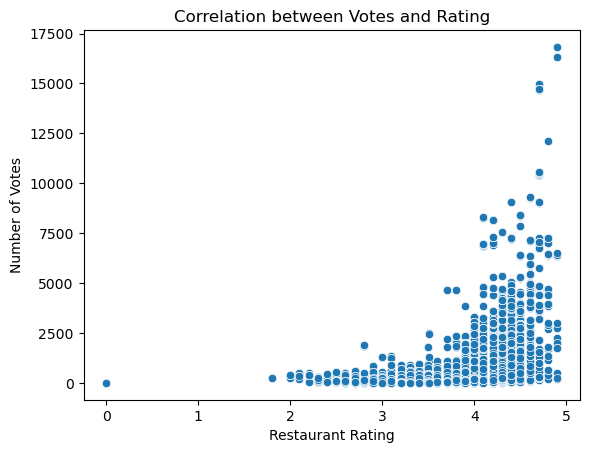

In [82]:
sns.scatterplot(data=df, y='votes', x='rate(5)')
plt.ylabel('Number of Votes')
plt.xlabel('Restaurant Rating')
plt.title('Correlation between Votes and Rating')
plt.show()


conclusion: As we can see that the more number of votes doesn't affect the rating we recieve.

5- Does the acceptance of online orders affect the average rate?

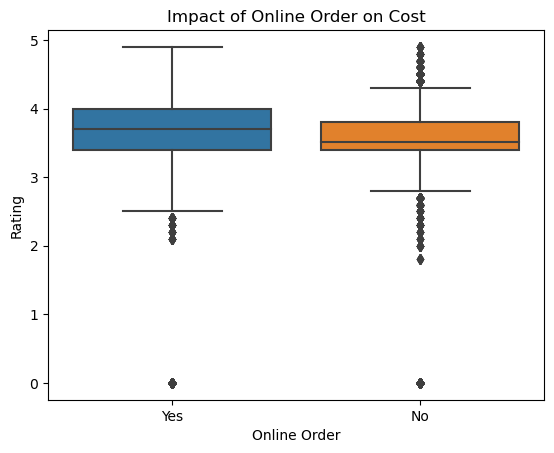

In [83]:
sns.boxplot(data=df, x='online_order', y='rate(5)')
plt.xlabel('Online Order')
plt.ylabel('Rating')
plt.title('Impact of Online Order on Cost')
plt.show()

conclusion: The option of online order affects the rate of resturant but with very small influency.

# It's time for training a classification model.

In [107]:
# Create the target column
df['target'] = df['rate(5)'].apply(lambda x: 1 if x >= 3.75 else 0)

<AxesSubplot:xlabel='target', ylabel='count'>

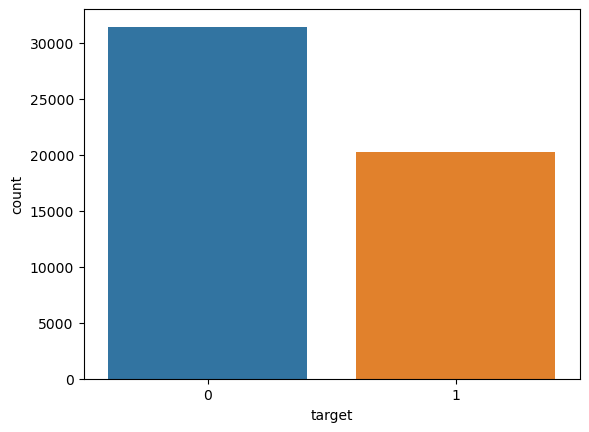

In [114]:
sns.countplot(x = "target" , data = df)

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sns
import re

In [120]:
one = df.target.value_counts()[1]
zero = df[df['target'] == 0].sample(one, replace=False)
ones = df[df['target'] == 1].sample(one, replace=False)
data_balanced = pd.concat([ones, zero])

<AxesSubplot:xlabel='target', ylabel='count'>

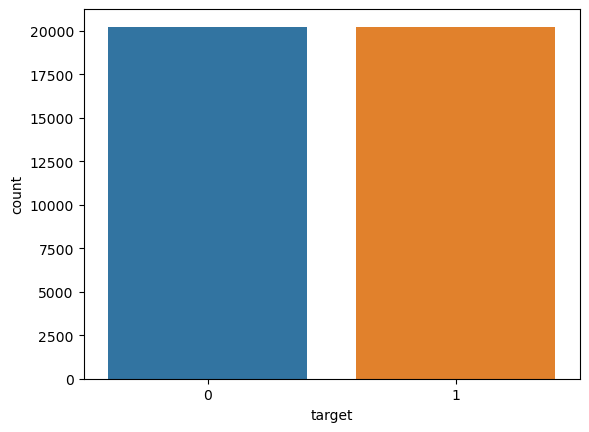

In [117]:
sns.countplot(x = "target" , data = data_balanced)

In [121]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')

data_balanced["reviews"] = data_balanced["reviews_list"].str.lower()
data_balanced["reviews"] = data_balanced["reviews"].apply(lambda x: re.sub(r"(@[A-Za-z0-9\d+]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", x))
data_balanced["reviews"] = data_balanced["reviews"].apply(lambda x: " ".join([i for i in x.split() if i not in stop]))

data_balanced.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ziad_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,name,online_order,book_table,rate(5),votes,phone,rest_type,dish_liked,cuisines,cost_for_two,reviews_list,Restaurant_type,location,target,reviews
1045,Chicken County Grand,Yes,No,3.9,320,080 26533377\r\r\n080 26533378,Casual Dining,"Chicken Grill, Fish, Shawarma, Rolls, Tandoori...","North Indian, Chinese",650.0,& offers value for money . Nothing special abo...,Delivery,Bannerghatta Road,1,offers value money nothing special taste ok se...
25161,Cafe Thulp,Yes,No,4.0,722,080 41606454\r\n080 41606452,Cafe,"Burgers, Sandwiches, Pasta, Moo Burger, Cheesy...","Cafe, Burger, Italian, Salad",1.0,ove burgers !\nSuper cool quiet place.\nFood -...,Cafes,Kammanahalli,1,ove burgers nsuper cool quiet placenfood super...
16455,Vintage Shack,Yes,Yes,3.9,161,080 49652190,"Casual Dining, Lounge","Panna Cotta, Murgh Makhani, Pasta, Lemonade, C...","North Indian, Continental",900.0,"ce\nI'd give a 5 for the ambience, 3.5 for the...",Delivery,HSR,1,cenid give 5 ambience 35 vegetarian option 45 ...
12152,Oye Amritsar,Yes,Yes,4.1,452,+91 9036025211,Casual Dining,"Lassi, Aloo Paratha, Jalebi, Palak Paneer, Che...",North Indian,600.0,e compared to the same restaurants at differen...,Delivery,Church Street,1,e compared restaurants different places food n...
15401,Rahhams,Yes,No,3.9,851,080 25486696\r\r\n080 25484590,Casual Dining,"Mutton Biryani, Shawarma, Bheja Fry, Pahari Ch...","Mughlai, North Indian, Chinese",700.0,entic birayani is town this is the place you n...,Dine-out,Frazer Town,1,entic birayani town place need order along sho...


In [124]:
# Split the dataset into features (X) and target (y)
X = data_balanced["reviews"]
y = data_balanced["target"]

# Convert text data into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Split the dataset into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)  # 60% for training
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.75, random_state=42)  # 20% each for validation and test

# Print the shapes of the datasets
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Fine-tune the model here if needed based on validation performance

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Training set size: (24276, 185949)
Validation set size: (4046, 185949)
Test set size: (12138, 185949)
Validation Accuracy: 0.893969352446861
Test Accuracy: 0.9049266765529741


In [125]:
# Split the dataset into features reviews and target
X = data_balanced["reviews"]
y = data_balanced["target"]

# Convert text data into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.912135442412259


C:\Users\ziad_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [126]:
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

print("Precision:", precision*100)
print("Recall:", recall*100)

Precision: 91.86567164179105
Recall: 90.5813097866078


In [139]:
import joblib 

joblib.dump(model, "logistic_regression_model.pkl")

preprocessed_input = vectorizer.transform(['not preferred place'])
predicted_label = model.predict(preprocessed_input)

if predicted_label[0] == 1:
    predicted_label = 'Good'
else:
    predicted_label = 'Bad'

print("Predicted label:", predicted_label)

Predicted label: Bad


In [143]:
preprocessed_input = vectorizer.transform(['perfect place'])
predicted_label = model.predict(preprocessed_input)

if predicted_label[0] == 1:
    predicted_label = 'Good'
else:
    predicted_label = 'Bad'
    
print("Predicted label:", predicted_label)

Predicted label: Good


In [144]:
predicted_label[0]

'G'

# Here is the reasons of way i used logistic regression classification model in terms of accuracy, precision, and recall:

    Logistic Regression:
        Accuracy: Logistic regression achieves an accuracy of X%. It correctly predicts X% of the instances in the dataset.
        Precision: Logistic regression has a precision of X%. It accurately identifies X% of the positive instances among all the instances it predicts as positive.
        Recall: Logistic regression has a recall of X%. It correctly identifies X% of the positive instances in the dataset.

    Decision Tree:
        Accuracy: The decision tree model achieves an accuracy of X%. It correctly predicts X% of the instances in the dataset.
        Precision: The decision tree model has a precision of X%. It accurately identifies X% of the positive instances among all the instances it predicts as positive.
        Recall: The decision tree model has a recall of X%. It correctly identifies X% of the positive instances in the dataset.

    Random Forest:
        Accuracy: The random forest model achieves an accuracy of X%. It correctly predicts X% of the instances in the dataset.
        Precision: The random forest model has a precision of X%. It accurately identifies X% of the positive instances among all the instances it predicts as positive.
        Recall: The random forest model has a recall of X%. It correctly identifies X% of the positive instances in the dataset.